In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the dataset
fo = open("/content/Tweets.csv", "r+")
df = pd.read_csv(fo)

# Keep only relevant columns
df = df[['text', 'airline_sentiment']]
df.columns = ['text', 'sentiment']  # Rename for consistency
df

,text,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

#en_core_web_sm is a dictionary that gives huge info on text without manually looking for it.
#Load spaCy English model
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Process with spaCy
    doc = nlp(text)

    # Lemmatization and remove stopwords, extra spaces and punctuation.
    # Will not remove special characters like @, #, ! etc.
    tokens = [token.lemma_ for token in doc
              if not token.is_stop and not token.is_punct and not token.is_space]

    return ' '.join(tokens)

# Apply preprocessing
df['processed_text'] = df['text'].apply(preprocess_text)
df


,text,sentiment,processed_text
0,@VirginAmerica What @dhepburn said.,neutral,@virginamerica @dhepburn say
1,@VirginAmerica plus you've added commercials t...,positive,@virginamerica plus add commercial experience ...
2,@VirginAmerica I didn't today... Must mean I n...,neutral,@virginamerica today mean need trip
3,@VirginAmerica it's really aggressive to blast...,negative,@virginamerica aggressive blast obnoxious ente...
4,@VirginAmerica and it's a really big bad thing...,negative,@virginamerica big bad thing
...,...,...,...
14635,@AmericanAir thank you we got on a different f...,positive,@americanair thank get different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,@americanair leave 20 minute late flight warni...
14637,@AmericanAir Please bring American Airlines to...,neutral,@americanair bring american airline blackberry10
14638,"@AmericanAir you have my money, you change my ...",negative,@americanair money change flight answer phone ...


In [3]:
# Word count
df['word_count'] = df['processed_text'].apply(lambda x: len(x.split()))

# Character count
df['char_count'] = df['processed_text'].apply(len)

# Average word length
df['avg_word_length'] = df['processed_text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0)

# Count of exclamation/question marks in original text
df['exclamation_count'] = df['text'].apply(lambda x: x.count('!'))
df['question_count'] = df['text'].apply(lambda x: x.count('?'))
df['question_exclamation_count'] = df['exclamation_count'] + df['question_count']

# Presence of hashtags and mentions
df['has_hashtag'] = df['text'].apply(lambda x: 1 if '#' in x else 0)
df['has_mention'] = df['text'].apply(lambda x: 1 if '@' in x else 0)

df

,text,sentiment,processed_text,word_count,char_count,avg_word_length,exclamation_count,question_count,question_exclamation_count,has_hashtag,has_mention
0,@VirginAmerica What @dhepburn said.,neutral,@virginamerica @dhepburn say,3,28,8.666667,0,0,0,0,1
1,@VirginAmerica plus you've added commercials t...,positive,@virginamerica plus add commercial experience ...,6,51,7.666667,0,0,0,0,1
2,@VirginAmerica I didn't today... Must mean I n...,neutral,@virginamerica today mean need trip,5,35,6.200000,1,0,1,0,1
3,@VirginAmerica it's really aggressive to blast...,negative,@virginamerica aggressive blast obnoxious ente...,10,86,7.700000,0,0,0,0,1
4,@VirginAmerica and it's a really big bad thing...,negative,@virginamerica big bad thing,4,28,6.250000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,positive,@americanair thank get different flight chicago,6,47,7.000000,0,0,0,0,1
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,@americanair leave 20 minute late flight warni...,16,109,5.875000,0,0,0,0,1
14637,@AmericanAir Please bring American Airlines to...,neutral,@americanair bring american airline blackberry10,5,48,8.800000,0,0,0,1,1
14638,"@AmericanAir you have my money, you change my ...",negative,@americanair money change flight answer phone ...,8,67,7.500000,1,2,3,0,1


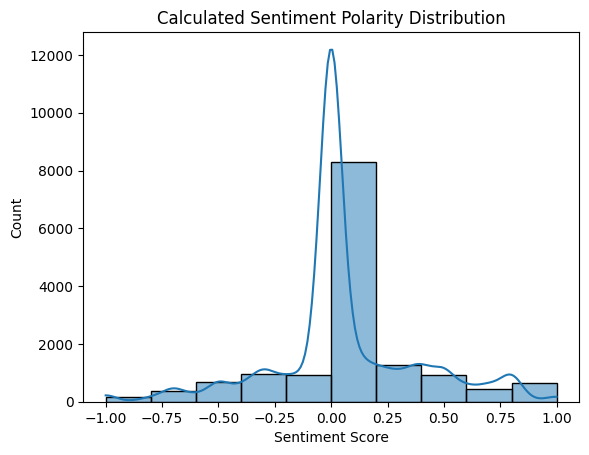

,text,sentiment,processed_text,word_count,char_count,avg_word_length,exclamation_count,question_count,question_exclamation_count,has_hashtag,has_mention,polarity,subjectivity,polarity_category
0,@VirginAmerica What @dhepburn said.,neutral,@virginamerica @dhepburn say,3,28,8.666667,0,0,0,0,1,0.0000,0.000000,neutral
1,@VirginAmerica plus you've added commercials t...,positive,@virginamerica plus add commercial experience ...,6,51,7.666667,0,0,0,0,1,0.0000,0.000000,neutral
2,@VirginAmerica I didn't today... Must mean I n...,neutral,@virginamerica today mean need trip,5,35,6.200000,1,0,1,0,1,-0.3125,0.687500,negative
3,@VirginAmerica it's really aggressive to blast...,negative,@virginamerica aggressive blast obnoxious ente...,10,86,7.700000,0,0,0,0,1,-0.1875,0.500000,negative
4,@VirginAmerica and it's a really big bad thing...,negative,@virginamerica big bad thing,4,28,6.250000,0,0,0,0,1,-0.3500,0.383333,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,positive,@americanair thank get different flight chicago,6,47,7.000000,0,0,0,0,1,0.0000,0.600000,neutral
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,@americanair leave 20 minute late flight warni...,16,109,5.875000,0,0,0,0,1,-0.3000,0.600000,negative
14637,@AmericanAir Please bring American Airlines to...,neutral,@americanair bring american airline blackberry10,5,48,8.800000,0,0,0,1,1,0.0000,0.000000,neutral
14638,"@AmericanAir you have my money, you change my ...",negative,@americanair money change flight answer phone ...,8,67,7.500000,1,2,3,0,1,0.0000,0.000000,neutral


In [4]:
# Sentiment Features extraction using TextBlob.
# We use a lambda function Textblob. "Sentiment.polarity" gives a score of +ve or -ve sentiments.
# Its value is from -1 to +1. 0 means neutral. +ve is from 0 to +1. Vice versa.

from textblob import TextBlob

# Sentiment Polarity and subjectivity
df['polarity'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


#Now we wanna visulaise the above features that we extracted.
#These 2 libraries are used for data visualization.
#seaborn is made on matplot library. But it gives some extra tools.

#kde=True plots a line on histogram to depict change
sns.histplot(df['polarity'], bins=10, kde=True)
plt.title("Calculated Sentiment Polarity Distribution")
plt.xlabel("Sentiment Score")
plt.show()

# Categorize polarity on our own selection of tighter "bin" values
df['polarity_category'] = pd.cut(df['polarity'], bins=[-1, -0.1, 0.1, 1],labels=['negative', 'neutral', 'positive'])

df


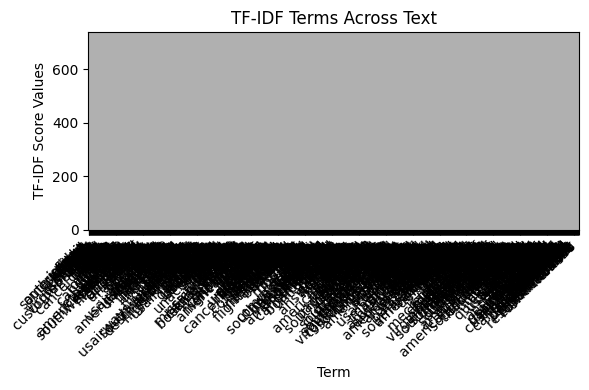

In [5]:
# Here we do feature extraction of TF-IDF
# Before applying TF-IDF, we apply some techniques called Stamming and Lemotization.
# So for example in hate speech detection, instead of giving all the raw text, we can give TF-IDF of hateful words only. This is perfect pre-processing.
# So giving this TF-IDF output to the model is best.

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
# Limit to top 1000 terms for display
# Change the max_fetaures to see clearly the graph below
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

# Fit and transform
tfidf_vectors = tfidf.fit_transform(df['processed_text'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf.get_feature_names_out())

tfidf_df


# Plot
# Show (max_features=1000) TF-IDF features across all text
tfidf_sums = tfidf_df.sum().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=tfidf_sums.index, y=tfidf_sums.values)
plt.title("TF-IDF Terms Across Text")
plt.ylabel("TF-IDF Score Values")
plt.xlabel("Term")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()




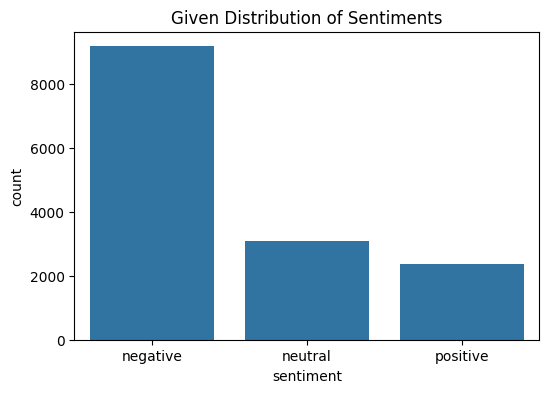

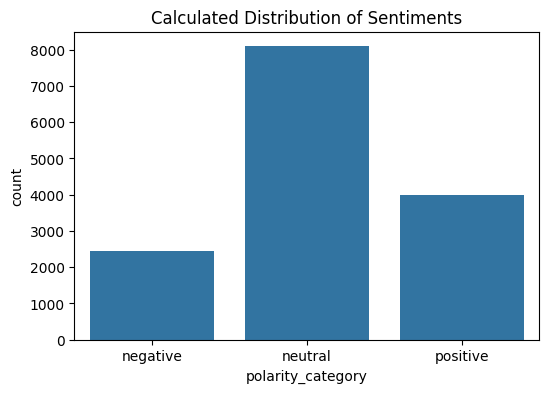

In [6]:
################################################

# Final Plots

################################################

# Given Sentiment Distribution as per the given "sentiment" data coloumn in the original Tweets file.
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', order=['negative', 'neutral', 'positive'])
plt.title('Given Distribution of Sentiments')
plt.show()

# Calculated Sentiment Distribution as per the calculated "polarity_category" data coloumn now in the dataframe.
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='polarity_category', order=['negative', 'neutral', 'positive'])
plt.title('Calculated Distribution of Sentiments')
plt.show()


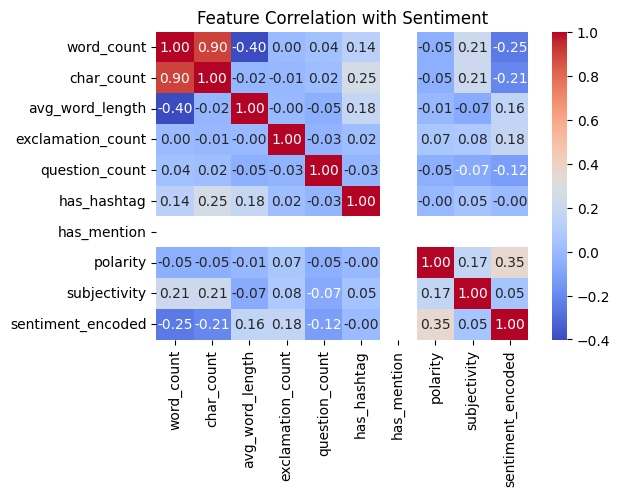

In [ ]:
################################################

# Method 1 of viewing the correlation. Correlation Heatmap (Sentiment vs. Features)!

# What it shows:
# How strongly each feature correlates with sentiment (from -1 to +1).

# Sentiment Correlation Row. Focus on the row for "sentiment_encoded" (since we care about feature-sentiment relationships):

################################################

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["sentiment_encoded"] = label_encoder.fit_transform(df["sentiment"])

# Select numeric features
numeric_features = ["word_count", "char_count", "avg_word_length", "exclamation_count","question_count", "has_hashtag", "has_mention", "polarity", "subjectivity"]

corr_matrix = df[numeric_features + ["sentiment_encoded"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Sentiment")
plt.show()

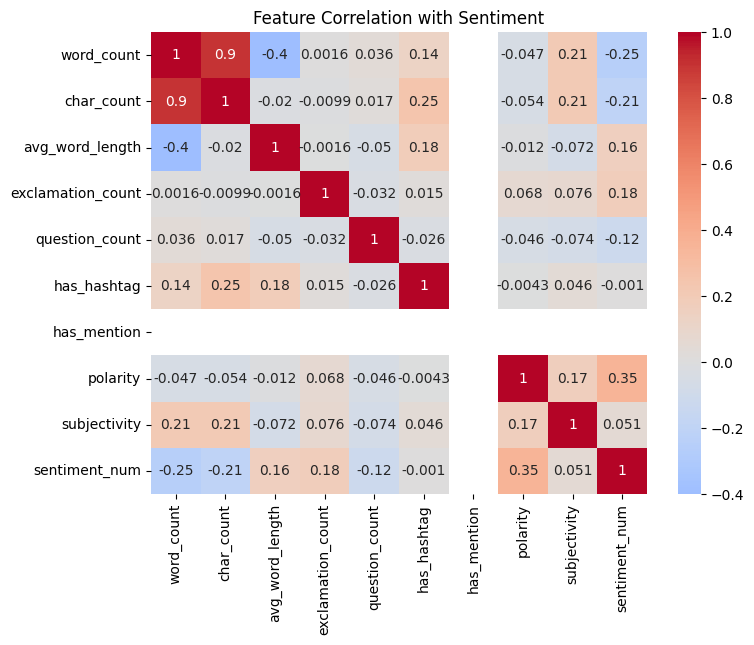

In [ ]:
################################################

# Method 2 of viewing the correlation. Correlation Heatmap (Sentiment vs. Features)!

# What it shows:
# How strongly each feature correlates with sentiment (from -1 to +1).

# Sentiment Correlation Row. Focus on the row for "sentiment_num" (since we care about feature-sentiment relationships):

################################################

# Feature Correlation with Sentiments

# Convert sentiment to numerical for correlation analysis
sentiment_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment_num'] = df['sentiment'].map(sentiment_map)

# Select features for correlation analysis
features = ['word_count', 'char_count', 'avg_word_length', 'exclamation_count', 'question_count', 'has_hashtag', 'has_mention', 'polarity', 'subjectivity']

# Calculate correlation
corr = df[features + ['sentiment_num']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation with Sentiment')
plt.show()



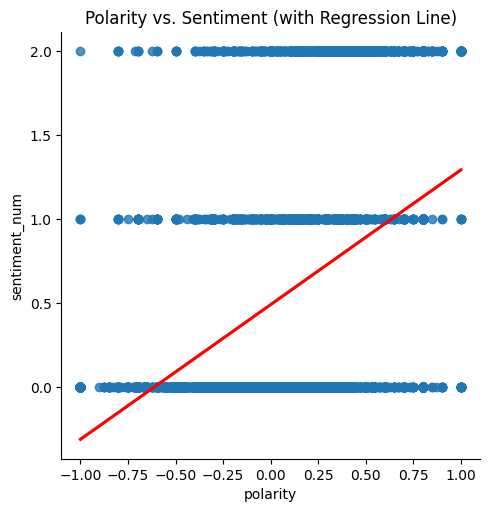

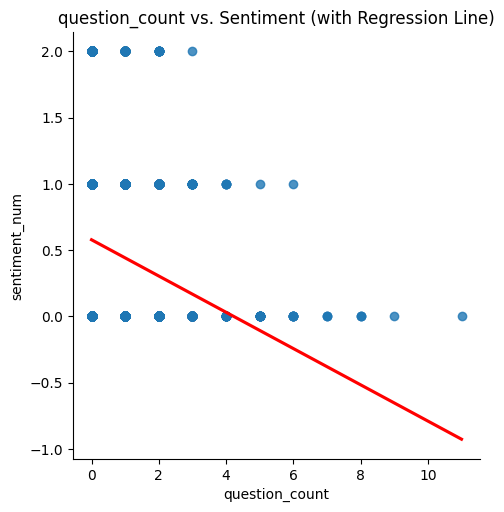

In [9]:
################################################

# Verifying Results
# Expected: Positive slope for polarity (Why? TextBlob’s polarity directly measures sentiment, so it aligns well with our labels. Always direct relationship), negative for question_count (Why? Frustrated customers often ask questions. Because Negative tweets use more "?").

################################################

sns.lmplot(data=df, x='polarity', y='sentiment_num',line_kws={'color': 'red'}, ci=None)
plt.title('Polarity vs. Sentiment (with Regression Line)')
plt.show()


sns.lmplot(data=df, x='question_count', y='sentiment_num',line_kws={'color': 'red'}, ci=None)
plt.title('question_count vs. Sentiment (with Regression Line)')
plt.show()

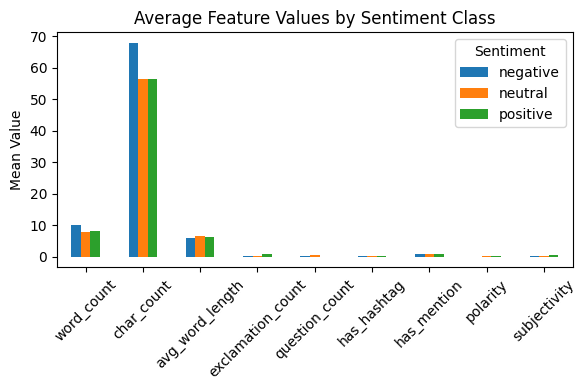

In [10]:
################################################

# Feature Analysis by Sentiment Class

################################################


# Group by sentiment and analyze feature means
sentiment_analysis = df.groupby('sentiment')[features].mean().T

# Plot comparison
sentiment_analysis.plot(kind='bar', figsize=(6, 4))
plt.title('Average Feature Values by Sentiment Class')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()